In [1]:
import os
import pandas as pd
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
data_fold = os.path.join("tools", "costs")
file_name = "gas_boiler.csv"

df = pd.read_csv(os.path.join(data_fold, file_name))
df["kCHF"] = df.CHF * 1e-3

In [4]:
popt_sup, _ = curve_fit(
    lambda x, a, b: a * x + b,
    df.loc[df.Pnom_kW > 100].Pnom_kW,
    df.loc[df.Pnom_kW > 100].kCHF,
    (1, 1),
)

popt_inf, _ = curve_fit(
    lambda x, a, b: a * x + b,
    df.loc[df.Pnom_kW <= 100].Pnom_kW,
    df.loc[df.Pnom_kW <= 100].kCHF,
    (1, 1),
)

<IPython.core.display.Javascript object>


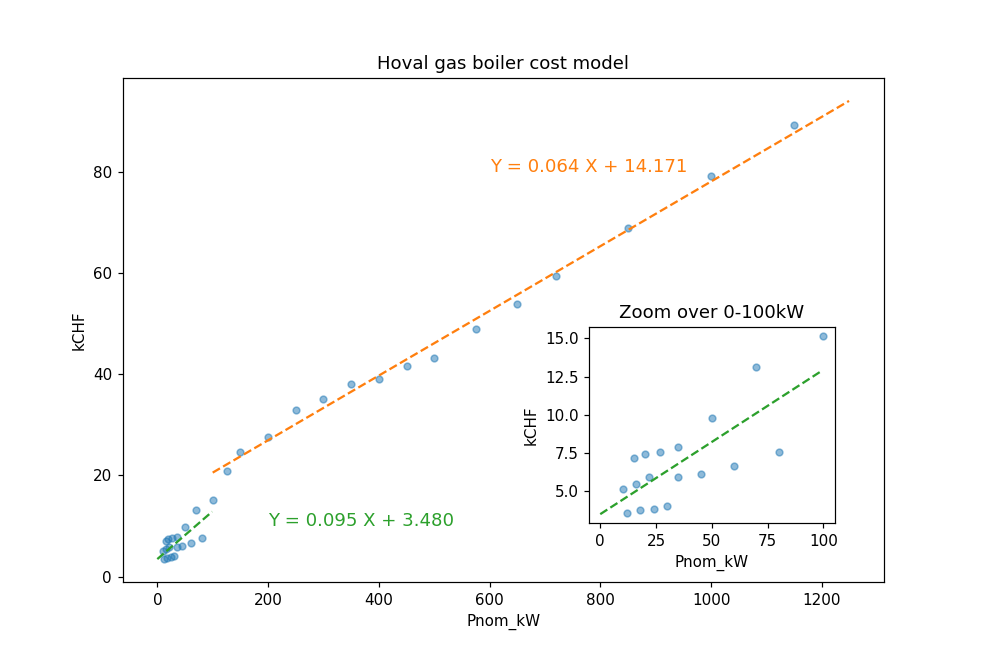

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))

df.plot.scatter(x="Pnom_kW", y="kCHF", ax=ax, alpha=0.5)

x = range(100, 1250)
ax.plot(x, popt_sup[0]*x + popt_sup[1], '--', color="C1")

x = range(0, 100)
ax.plot(x, popt_inf[0]*x + popt_inf[1], '--', color="C2")

zoom = plt.axes([.6, .2, .25, .3])
df.loc[df.Pnom_kW <= 100].plot.scatter(x="Pnom_kW", y="kCHF", ax=zoom, alpha=0.5)
zoom.plot(x, popt_inf[0]*x + popt_inf[1], '--', color="C2")

ax.annotate("Y = {:.3f} X + {:.3f}".format(*popt_sup), (600, 80), c="C1", size="large")
ax.annotate("Y = {:.3f} X + {:.3f}".format(*popt_inf), (200, 10), c="C2", size="large")

ax.set_title("Hoval gas boiler cost model")
zoom.set_title("Zoom over 0-100kW")

plt.savefig(os.path.join("images", "hoval_gas_cost_model.png"), dpi=150, bbox_inches="tight")

In [6]:
import json

filename = "capex_boiler.json"
filepath = os.path.join(data_fold, filename)

capex_boiler = {"gas": {"sup": popt_sup.tolist(), "inf": popt_inf.tolist(), "man": 1.8}}

if filename in os.listdir(data_fold):
    with open(filepath) as json_file:
        capex_boiler.update(json.load(json_file))
    
with open(filepath, 'w') as outfile:
    json.dump(capex_boiler, outfile)